##Install Required Libraries

In [1]:
!pip install langdetect
!pip install nltk
!pip install langid
!pip install -qq transformers
!pip install transformers
!pip install datasets
!pip install sentencepiece
!pip install rouge nltk
!pip install catboost
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install transformers
!pip install sentencepiece
!pip install -U transformers
!pip install rouge-score
!pip install rouge

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=18a0ba336c5b3bac42c1005d4d0e5bc57f1a841d9a9cf62d2a08e7b37e7a623f
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941170 sha256=715744066ae3ea477f8184513853275f2697d44e79d1371fe473d4579b5a3e69
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:
import nltk
from langdetect import detect
import pandas as pd
import numpy as np
import re
import csv
import datasets
import torch
import torch.nn as nn
import torch.nn.functional as F
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
import numpy as np
import networkx as nx
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from tabulate import tabulate
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import STOPWORDS
import re
import string
from collections import Counter
from collections import defaultdict
from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import LabelEncoder
import langid
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
import networkx
from bokeh.io import output_notebook, show, save
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import STOPWORDS
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
from rouge import Rouge
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_hub as hub
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.util import ngrams


In [3]:
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [4]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

##Dataset

In [5]:
#download xsum dataset
train_df = datasets.load_dataset("xsum", split="train")
val_df = datasets.load_dataset("xsum", split="validation")
test_df = datasets.load_dataset("xsum", split="test")

Generating train split:   0%|          | 0/204045 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11332 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11334 [00:00<?, ? examples/s]

### Loading Dataset

In [12]:
#convert datasets to dataframes
train=pd.DataFrame(train_df)
val=pd.DataFrame(val_df)
test=pd.DataFrame(test_df)

In [13]:
#combine the 3 dataframes into one
data = pd.concat([train, val, test], axis=0)


In [14]:
data.head()

,document,summary,id
0,"The full cost of damage in Newton Stewart, one...",Clean-up operations are continuing across the ...,35232142
1,A fire alarm went off at the Holiday Inn in Ho...,Two tourist buses have been destroyed by fire ...,40143035
2,Ferrari appeared in a position to challenge un...,Lewis Hamilton stormed to pole position at the...,35951548
3,"John Edward Bates, formerly of Spalding, Linco...",A former Lincolnshire Police officer carried o...,36266422
4,Patients and staff were evacuated from Cerahpa...,An armed man who locked himself into a room at...,38826984


In [15]:
#work on 3000 samples out of 226711
data = data.head(3000)

In [16]:
data.head()

,document,summary,id
0,"The full cost of damage in Newton Stewart, one...",Clean-up operations are continuing across the ...,35232142
1,A fire alarm went off at the Holiday Inn in Ho...,Two tourist buses have been destroyed by fire ...,40143035
2,Ferrari appeared in a position to challenge un...,Lewis Hamilton stormed to pole position at the...,35951548
3,"John Edward Bates, formerly of Spalding, Linco...",A former Lincolnshire Police officer carried o...,36266422
4,Patients and staff were evacuated from Cerahpa...,An armed man who locked himself into a room at...,38826984


In [20]:
# Open the text file
with open("XSum-WebArxiveUrls-BBCids.txt", "r") as file:
    data1 = file.read()

# Extract the label from each URL using regular expressions
labels = re.findall(r"bbc[^\/]*(\/.+)", data1)

# Create a dataframe to store the labels
df = pd.DataFrame({'Label': labels})

# Print the extracted labels
print(df)


                                                    Label
0                     /sport/athletics/35680662\t35680662
1                   /news/world-europe-36236576\t36236576
2                       /news/business-34171261\t34171261
3                           /newsround/38302280\t38302280
4                    /sport/ice-hockey/37722200\t37722200
...                                                   ...
226706       /news/science-environment-37311716\t37311716
226707  /news/uk-northern-ireland-politics-36819854\t3...
226708                        /news/uk-35268824\t35268824
226709                    /news/health-30348499\t30348499
226710  /news/uk-scotland-glasgow-west-35976951\t35976951

[226711 rows x 1 columns]


In [21]:
# Extract the number part from the label in the second data frame
df['id'] = df['Label'].str.extract(r'(\d+)')
df['id']

0         35680662
1         36236576
2         34171261
3         38302280
4         37722200
            ...   
226706    37311716
226707    36819854
226708    35268824
226709    30348499
226710    35976951
Name: id, Length: 226711, dtype: object

In [22]:
df.head()

,Label,id
0,/sport/athletics/35680662\t35680662,35680662
1,/news/world-europe-36236576\t36236576,36236576
2,/news/business-34171261\t34171261,34171261
3,/newsround/38302280\t38302280,38302280
4,/sport/ice-hockey/37722200\t37722200,37722200


In [23]:
# Merge the data frames based on the extracted number part
merged_df = pd.merge(df, data, on='id' , how='inner')

merged_df.head()


,Label,id,document,summary
0,/news/uk-scotland-north-east-orkney-shetland-3...,34913320,The Scottish SPCA said the owner could not lon...,New homes are being sought for a pair of iguan...
1,/news/business-21226611\t21226611,21226611,Toyota said it sold 9.75 million vehicles in 2...,Japanese carmaker Toyota has regained its slot...
2,/sport/football/38789851\t38789851,38789851,Burns sustained a dislocated collarbone after ...,Linfield midfielder Aaron Burns and Dungannon ...
3,/news/uk-northern-ireland-32264311\t32264311,32264311,The Fire Service said that while some blazes o...,There were 40 gorse fires in Counties Tyrone a...
4,/news/world-middle-east-34959807\t34959807,34959807,The move follows the bloc's decision to label ...,Israel has said it is suspending contact with ...


In [29]:
# Define the set of categories
categories = set([
    'news', 'politics', 'sport', 'weather', 'business',
    'technology', 'science', 'health', 'family',
    'education', 'entertainment', 'arts'
])

# Function to extract words from the 'Label' column
def extract_words(label):
    parts = label.split('/')
    words = []
    for part in parts:
        sub_parts = part.split('-')
        for sub_part in sub_parts:
            if sub_part in categories:
                words.append(sub_part)
    return ', '.join(words)


# Apply the function to extract the specific words
merged_df['extracted_words'] = merged_df['Label'].apply(extract_words)

In [30]:
merged_df.head()

,Label,id,document,summary,extracted_words
0,/news/uk-scotland-north-east-orkney-shetland-3...,34913320,The Scottish SPCA said the owner could not lon...,New homes are being sought for a pair of iguan...,news
1,/news/business-21226611\t21226611,21226611,Toyota said it sold 9.75 million vehicles in 2...,Japanese carmaker Toyota has regained its slot...,"news, business"
2,/sport/football/38789851\t38789851,38789851,Burns sustained a dislocated collarbone after ...,Linfield midfielder Aaron Burns and Dungannon ...,sport
3,/news/uk-northern-ireland-32264311\t32264311,32264311,The Fire Service said that while some blazes o...,There were 40 gorse fires in Counties Tyrone a...,news
4,/news/world-middle-east-34959807\t34959807,34959807,The move follows the bloc's decision to label ...,Israel has said it is suspending contact with ...,news


In [31]:
# Define the replacement dictionary
replacement_dict = {
    'news, business': 'business',
    'sport, sport': 'sport' ,
    'news, health': 'health' ,
    'news, science': 'science' ,
    'news, entertainment, arts': 'entertainment' ,
    'news, politics': 'politics' ,
    'news, technology': 'technology' ,
    'news, education': 'education' ,
    'sport, sport': 'sport'


}

# Apply replacements using the replace() method
merged_df['extracted_words'] = merged_df['extracted_words'].replace(replacement_dict)

merged_df.head(50)

,Label,id,document,summary,extracted_words
0,/news/uk-scotland-north-east-orkney-shetland-3...,34913320,The Scottish SPCA said the owner could not lon...,New homes are being sought for a pair of iguan...,news
1,/news/business-21226611\t21226611,21226611,Toyota said it sold 9.75 million vehicles in 2...,Japanese carmaker Toyota has regained its slot...,business
2,/sport/football/38789851\t38789851,38789851,Burns sustained a dislocated collarbone after ...,Linfield midfielder Aaron Burns and Dungannon ...,sport
3,/news/uk-northern-ireland-32264311\t32264311,32264311,The Fire Service said that while some blazes o...,There were 40 gorse fires in Counties Tyrone a...,news
4,/news/world-middle-east-34959807\t34959807,34959807,The move follows the bloc's decision to label ...,Israel has said it is suspending contact with ...,news
5,/news/uk-wales-39193924\t39193924,39193924,Paul Chichester was back in his home city to s...,Wales is well placed to take advantage of the ...,news
6,/news/uk-england-merseyside-34985923\t34985923,34985923,Anthony Tomlinson said Alison Wilson decided t...,A woman who was killed after she stepped in du...,news
7,/news/uk-england-tees-30534051\t30534051,30534051,"Gary Anthony Burgess, 50, left open prison HMP...",A police hunt is under way for a Teesside burg...,news
8,/news/uk-england-wiltshire-32509613\t32509613,32509613,"Mark Wylie, from Calne, beat off competition f...","A Wiltshire man has become the ""first Brit"" to...",news
9,/news/world-africa-30175988\t30175988,30175988,"""We call for an independent commission of inqu...",Nigeria's main opposition party has condemned ...,news


In [32]:
merged_df['extracted_words'].unique()

array(['news', 'business', 'sport', 'entertainment', 'politics', '',
       'technology', 'health', 'science', 'education'], dtype=object)

In [33]:
# Count the number of rows where the 'category' column is an empty string ('')
empty_rows_count = len(merged_df[merged_df['extracted_words'] == ''])

print("Number of rows with label '':", empty_rows_count)

Number of rows with label '': 67


In [34]:

merged_df = merged_df[merged_df['extracted_words'] != '']


In [35]:
#Drop the columns 'Label' and 'Labels'
merged_df = merged_df.drop(columns=['Label', 'id'])

In [36]:
#rename extracted_words with label
merged_df.rename(columns={'extracted_words': 'label'}, inplace=True)
merged_df.head()

,document,summary,label
0,The Scottish SPCA said the owner could not lon...,New homes are being sought for a pair of iguan...,news
1,Toyota said it sold 9.75 million vehicles in 2...,Japanese carmaker Toyota has regained its slot...,business
2,Burns sustained a dislocated collarbone after ...,Linfield midfielder Aaron Burns and Dungannon ...,sport
3,The Fire Service said that while some blazes o...,There were 40 gorse fires in Counties Tyrone a...,news
4,The move follows the bloc's decision to label ...,Israel has said it is suspending contact with ...,news


##EDA

###Text Statistics:

In [63]:
# Calculate basic statistics of the text data
document_lengths = merged_df['document'].apply(lambda x: len(word_tokenize(x)))
average_length = document_lengths.mean()
min_length = document_lengths.min()
max_length = document_lengths.max()

# Tokenize the documents to get individual words and count unique words
all_words = [word_tokenize(doc) for doc in merged_df['document']]
all_unique_words = set(word for doc_words in all_words for word in doc_words)

num_unique_words = len(all_unique_words)

print("Average Document Length:", average_length)
print("Minimum Document Length:", min_length)
print("Maximum Document Length:", max_length)
print("Number of Unique Words:", num_unique_words)

Average Document Length: 432.3548611111111
Minimum Document Length: 12
Maximum Document Length: 3576
Number of Unique Words: 51375


In [71]:
def plot_document_length_statistics(average_length, min_length, max_length):
    data = pd.DataFrame({
        'Statistic': ['Average Length', 'Minimum Length', 'Maximum Length'],
        'Length': [average_length, min_length, max_length]
    })

    sns.set(rc={'axes.facecolor': 'whitesmoke'})
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Statistic', y='Length', data=data, palette="ch:s=3,r=.03")

    for index, value in enumerate(data['Length']):
        plt.text(index, value + 1, str(round(value, 2)), color='black', fontsize=12, ha='center')

    plt.title('Document Length Statistics', fontsize=14)
    plt.xlabel('Statistic', fontsize=12)
    plt.ylabel('Length', fontsize=12)

    plt.show()

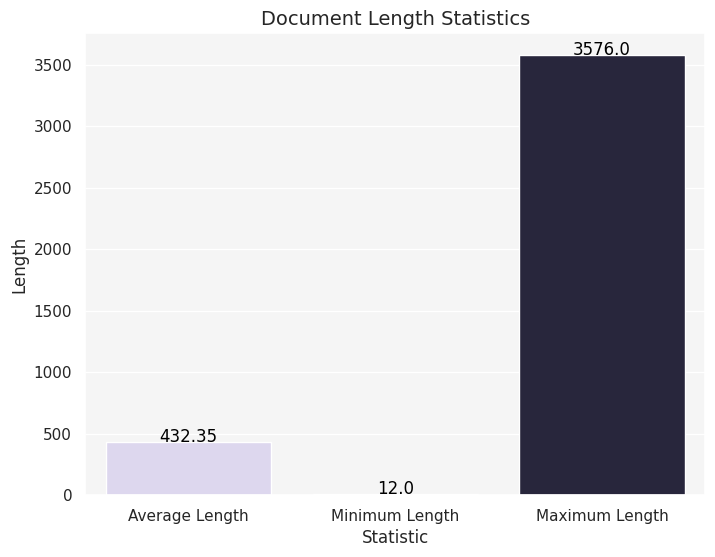

In [72]:
plot_document_length_statistics(average_length, min_length, max_length)


###Summary Statistics:

In [65]:
summary_lengths = merged_df['summary'].apply(lambda x: len(x.split()))
average_summary_length = summary_lengths.mean()

print("Average Summary Length:", average_summary_length)


Average Summary Length: 21.179861111111112


In [69]:
def plot_document_and_summary_lengths(document_lengths, summary_lengths):
    sns.set_style("darkgrid", rc={'axes.facecolor': 'whitesmoke'})
    plt.figure(figsize=(12, 6))

    # Plot document lengths
    plt.subplot(1, 2, 1)
    sns.histplot(document_lengths, kde=True, color='thistle')
    plt.title('Document Lengths Distribution')
    plt.xlabel('Document Length')
    plt.ylabel('Frequency')

    # Plot summary lengths
    plt.subplot(1, 2, 2)
    sns.histplot(summary_lengths, kde=True, palette="ch:s=-.2,r=.6")
    plt.title('Summary Lengths Distribution')
    plt.xlabel('Summary Length')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

<ipython-input-69-fa2747983579>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(summary_lengths, kde=True, palette="ch:s=-.2,r=.6")


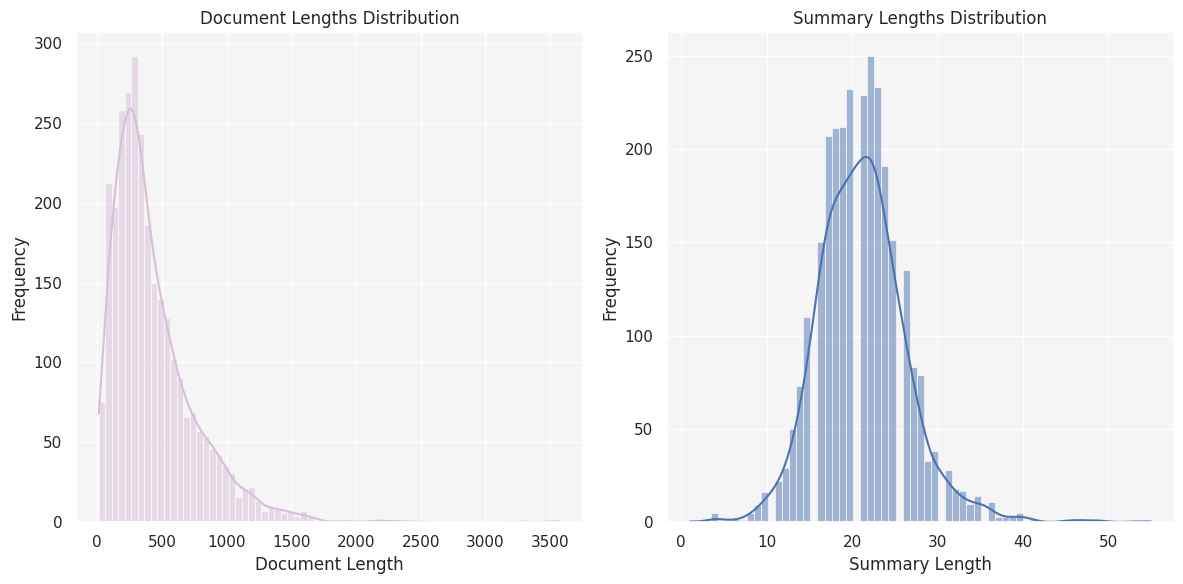

In [70]:
plot_document_and_summary_lengths(document_lengths, summary_lengths)


###Class Distribution:

In [67]:
def plot_class_distribution(df, class_column):
    # Count the occurrences of each class in the specified column
    class_counts = df[class_column].value_counts()

    # Get unique class names
    class_names = class_counts.index.tolist()

    # Set custom colors for each class
    custom_colors = sns.color_palette("ch:s=-.1,r=.2", n_colors=len(class_names))

    # Create the barplot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=class_counts.index, y=class_counts.values, palette=custom_colors)

    # Add labels and title
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.title('Class Distribution')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Create custom legend labels and add the legend
    legend_labels = [plt.Rectangle((0, 0), 1, 1, fc=custom_colors[i]) for i in range(len(class_names))]
    plt.legend(legend_labels, class_names, title='Class Label', loc='upper right')

    # Show the plot
    plt.show()

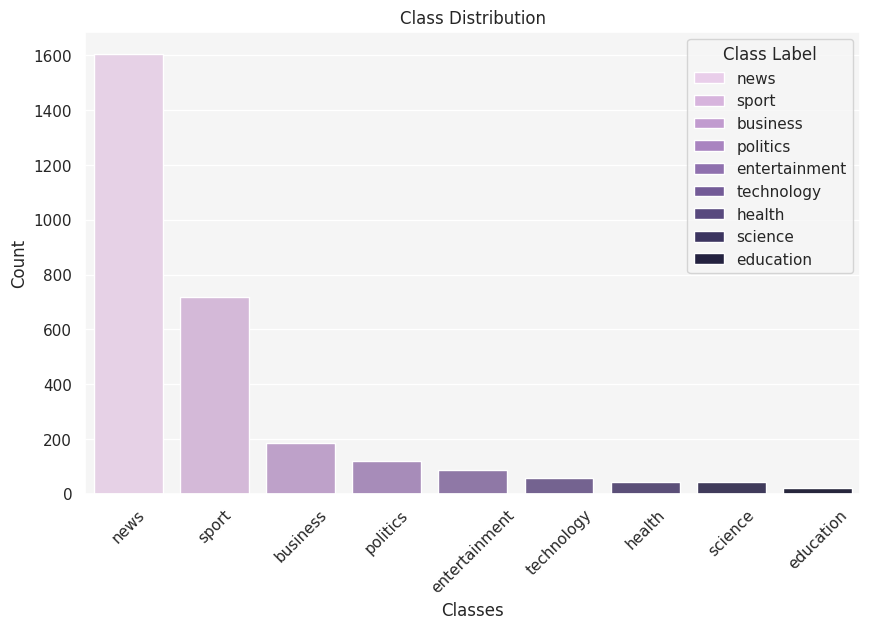

In [68]:
plot_class_distribution(merged_df, 'label')

In [73]:
def plot_category_distribution(df):
    category_counts = df['label'].value_counts()
    total_articles = len(df)  # Get the total number of articles
    category_percentages = (category_counts / total_articles) * 100

    # Get the category names and percentages as lists
    categories = category_percentages.index.tolist()
    percentages = category_percentages.tolist()

    # Create a colormap
    colors = plt.cm.get_cmap('twilight')

    # Define a scaling factor for the bubble size
    scaling_factor = 800

    # Create a bubble graph with different colors and labels for each category
    plt.figure(figsize=(15, 8))
    plt.scatter(categories, percentages, s=np.array(percentages) * scaling_factor, c=range(len(categories)), cmap=colors, alpha=0.5)
    plt.xlabel('Categories')
    plt.ylabel('Percentage of Articles')
    plt.title('Distribution Percentage of Each Category')
    plt.xticks(rotation=55)

    # Add category labels to the bubbles with percentages
    for i, category in enumerate(categories):
        plt.text(category, percentages[i], f"{percentages[i]:.2f}%", ha='center', va='center', fontsize=13)

    plt.colorbar(label='Category Index')
    plt.show()


<ipython-input-73-8de1137d281a>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('twilight')


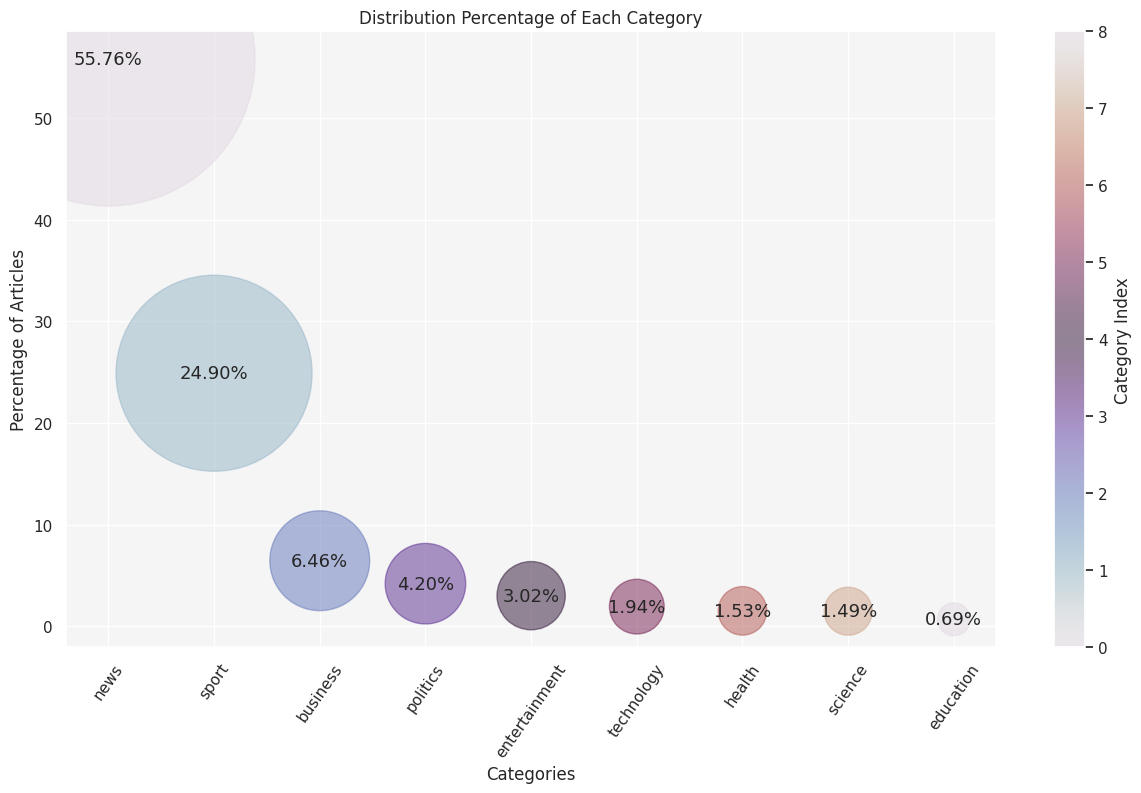

In [74]:
plot_category_distribution(merged_df)


#preprocessing

In [43]:
merged_df.shape

(2880, 3)

In [44]:
stop_words = list(STOPWORDS)
print(stop_words)

['re', 'and', 'bill', 'our', 'seem', 'again', 'kg', 'hereupon', 'whence', 'no', 'side', 'from', 'always', 'sixty', 'whether', 'anyway', 'without', 'by', 'fill', 'nor', 'whenever', 'myself', 'since', 'nowhere', 'already', 'anywhere', 'them', 'quite', 'nothing', 'somewhere', 'whither', 'so', 'there', 'mostly', 'everywhere', 'also', 'make', 'former', 'anyhow', 'thereupon', 'fire', 'mill', 'before', 'for', 'although', 'nevertheless', 'eg', 'wherein', 'except', 'hereafter', 'detail', 'down', 'thence', 'say', 'yourselves', 'someone', 'several', 'something', 'doesn', 'whose', 'doing', 'con', 'once', 'back', 'whole', 'bottom', 'now', 'how', 'system', 'one', 'further', 'un', 'becoming', 'after', 'behind', 'name', 'serious', 'her', 'a', 'whereas', 'cannot', 'done', 'among', 'eleven', 'can', 'herself', 'three', 'with', 'had', 'moreover', 'everyone', 'toward', 'became', 'etc', 'such', 'i', 'cry', 'below', 'over', 'cant', 'de', 'fifty', 'are', 'ie', 'front', 'was', 'throughout', 'beyond', 'along', 

In [45]:

# Create a function to detect the language of a given text
def detect_language(text):
    try:
            # Apply the language detection function to the "text" column
        return langid.classify(text)[0]
    except:
        return None

merged_df["language"] = merged_df["document"].apply(detect_language)

# Filter the DataFrame to include only English language records
df_english = merged_df[merged_df["language"] == "en"].copy()



In [46]:
merged_df.shape

(2880, 4)

In [47]:
df_english.shape

(2880, 4)

In [48]:
def clean_text(text):
    # Remove HTML tags/markups
    text = re.compile('<.*?>').sub('', text)

    # Replace punctuation with space
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)

    # Remove digits
    text = re.sub(r'\d', ' ', text)

    # Remove non-word characters
    text = re.sub(r'[^\w\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)

    # Convert to lowercase
    text = text.lower()

    return text.strip()

In [49]:
df_english.shape

(2880, 4)

In [50]:
#remove stopwords
print("\nremove stopwords\n")
def remove_stopwords_from_text(text):
    return remove_stopwords(text)
text=remove_stopwords_from_text(str(data))
print(text)
#lemm words
print("\n stemmed text\n")
lemmatizer = WordNetLemmatizer()
def lemm(data):
    a=[lemmatizer.lemmatize(i) for i in word_tokenize(data) ]
    return ' '.join(a)
text=lemm(str(data))
print(text)


remove stopwords

Statistic Length 0 Average Length 375.814583 1 Minimum Length 11.000000 2 Maximum Length 3125.000000

 stemmed text

Statistic Length 0 Average Length 375.814583 1 Minimum Length 11.000000 2 Maximum Length 3125.000000


In [51]:
#num of words before cleaning
merged_df['document'].apply(lambda x: len(x.split(' '))).sum()

1038824

In [52]:
#final preprocessing function
def finalpreprocess(data):
    dd=lemm(remove_stopwords_from_text(clean_text(data)))
    return str(dd)

merged_df['clean_text'] = merged_df['document'].apply(lambda x: finalpreprocess(x))

merged_df.head()


,document,summary,label,language,clean_text
0,The Scottish SPCA said the owner could not lon...,New homes are being sought for a pair of iguan...,news,en,scottish spca said owner longer look large liz...
1,Toyota said it sold 9.75 million vehicles in 2...,Japanese carmaker Toyota has regained its slot...,business,en,toyota said sold million vehicle jump year ear...
2,Burns sustained a dislocated collarbone after ...,Linfield midfielder Aaron Burns and Dungannon ...,sport,en,burn sustained dislocated collarbone falling a...
3,The Fire Service said that while some blazes o...,There were 40 gorse fires in Counties Tyrone a...,news,en,service said blaze friday accidental started d...
4,The move follows the bloc's decision to label ...,Israel has said it is suspending contact with ...,news,en,follows bloc s decision label good jewish sett...


In [53]:
merged_df=merged_df.drop(columns=['language'])

In [54]:
#num of words after cleaning
merged_df['clean_text'].apply(lambda x: len(x.split(' '))).sum()

561218

### word cloud

In [78]:
def plot_wordclouds(df, start_index, num_subplots):
    wc = WordCloud(max_font_size=50, max_words=100, background_color="white")

    fig, axes = plt.subplots(nrows=1, ncols=num_subplots, figsize=(20, 6))

    for i, ax in enumerate(axes.flatten()):
        wc.generate(str(merged_df[(start_index + i * 200):(start_index + (i + 1) * 200)]["clean_text"]))
        ax.imshow(wc, interpolation="bilinear")
        font1 = {'family': 'serif', 'color': 'blue', 'size': 20}
        ax.axis('off')

    plt.tight_layout()
    plt.show()

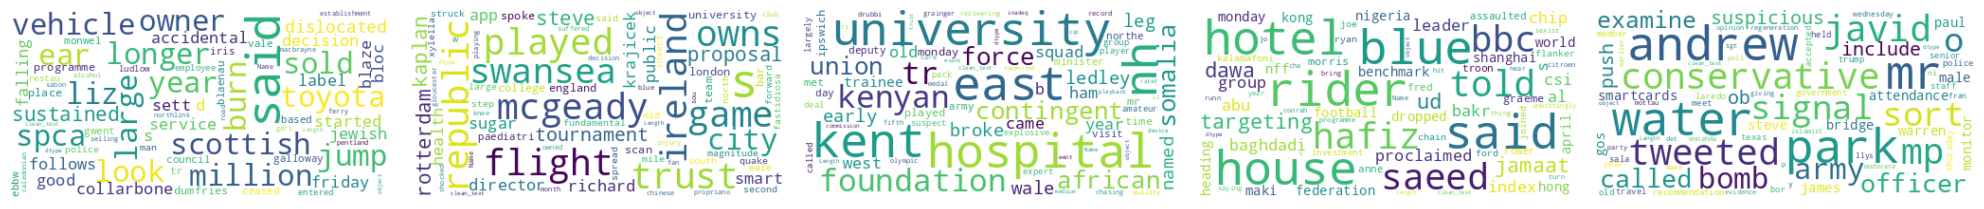

In [80]:
plot_wordclouds(merged_df, 0, 5)


###Topic Modeling:

In [81]:
def topic_modeling_with_lda(merged_df, num_topics=5, max_features=1000):
    # Vectorize the cleaned documents using TF-IDF
    vectorizer = TfidfVectorizer(max_features=max_features)
    tfidf_matrix = vectorizer.fit_transform(merged_df['clean_text'])

    # Apply Latent Dirichlet Allocation for topic modeling
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    topics = lda_model.fit_transform(tfidf_matrix)

    # Display the top words for each topic
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_model.components_):
        print(f"Topic {topic_idx + 1}:")
        top_words_indices = topic.argsort()[:-10 - 1:-1]
        top_words = [feature_names[i] for i in top_words_indices]
        print(top_words)


In [82]:
num_topics = 5
max_features = 1000

topic_modeling_with_lda(merged_df, num_topics=num_topics, max_features=max_features)

Topic 1:
['foul', 'kick', 'box', 'half', 'corner', 'shot', 'footed', 'saved', 'free', 'attempt']
Topic 2:
['mr', 'said', 'police', 'court', 'people', 'year', 'party', 'president', 'told', 'family']
Topic 3:
['said', 'year', 'people', 'council', 'new', 'uk', 'mr', 'company', 'government', 'service']
Topic 4:
['police', 'car', 'road', 'bst', 'man', 'driver', 'incident', 'crash', 'scene', 'hospital']
Topic 5:
['game', 'club', 'season', 'league', 'team', 'player', 'year', 'final', 'play', 'win']


###N-grams Analysis:

In [83]:
def extract_and_get_most_common_ngrams(df, text_column, n, top_n=5):
    # Function to extract n-grams from a text
    def extract_ngrams(text, n):
        words = text.split()
        return list(ngrams(words, n))

    # Apply the extract_ngrams function to create the n-grams
    df['ngrams'] = df[text_column].apply(lambda x: extract_ngrams(x, n))

    # Combine all n-grams into a single list
    all_ngrams = [ngram for sublist in df['ngrams'] for ngram in sublist]

    # Count the occurrences of each n-gram
    ngram_counts = pd.Series(all_ngrams).value_counts()

    # Get the top N most common n-grams
    most_common_ngrams = ngram_counts.head(top_n)

    return most_common_ngrams

In [89]:
text_column = 'clean_text'
n = 3
top_n = 5

most_common_bigrams = extract_and_get_most_common_ngrams(merged_df, text_column, n, top_n)
print(most_common_bigrams)

(win, free, kick)                440
(right, footed, shot)            286
(medium, playback, supported)    255
(playback, supported, device)    255
(kick, defensive, half)          188
dtype: int64


#### Sentiment Analysis

In [86]:
def present_scores_as_table(list1, list2, list3):
    if len(list1) != len(list2) or len(list1) != len(list3):
        raise ValueError("All lists must have the same length.")

    # Combine the three lists into a list of triples
    triples = list(zip(list1, list2, list3))

    # Create a table with headers and the triples as rows
    table = tabulate(triples, headers=['Name', 'Score', 'Overall_Emotion'], tablefmt='grid')
    print(table)


In [87]:
def SentimentAnalysis(column):
    nltk.download('vader_lexicon')

    scores = []
    overall_emotions = []

    for index, document in column.iteritems():
        # Instantiate the sentiment analyzer
        sia = SentimentIntensityAnalyzer()

        # Analyze the sentiment for each sentence in the document
        sentences = nltk.sent_tokenize(document)
        sentiment_scores = [sia.polarity_scores(sentence) for sentence in sentences]

        # Calculate the overall sentiment score for the document
        compound_scores = [score['compound'] for score in sentiment_scores]

        if len(compound_scores) > 0:
            overall_sentiment = sum(compound_scores) / len(compound_scores)
        else:
            overall_sentiment = 0.0

        # Determine the overall emotion
        if overall_sentiment >= 0.05:
            overall_emotions.append('Positive')
        elif overall_sentiment <= -0.05:
            overall_emotions.append('Negative')
        else:
            overall_emotions.append('Neutral')

        scores.append(f"{overall_sentiment:.2f}")

    present_scores_as_table(column.index, scores, overall_emotions)

In [88]:
SentimentAnalysis(merged_df['clean_text'])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-87-34bf8939740f>:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, document in column.iteritems():


+--------+---------+-------------------+
|   Name |   Score | Overall_Emotion   |
+========+=========+===================+
|      0 |    0.97 | Positive          |
+--------+---------+-------------------+
|      1 |    0.93 | Positive          |
+--------+---------+-------------------+
|      2 |   -0.67 | Negative          |
+--------+---------+-------------------+
|      3 |   -0.59 | Negative          |
+--------+---------+-------------------+
|      4 |   -0.83 | Negative          |
+--------+---------+-------------------+
|      5 |    0.92 | Positive          |
+--------+---------+-------------------+
|      6 |   -0.99 | Negative          |
+--------+---------+-------------------+
|      7 |   -0.88 | Negative          |
+--------+---------+-------------------+
|      8 |    0.98 | Positive          |
+--------+---------+-------------------+
|      9 |   -0.94 | Negative          |
+--------+---------+-------------------+
|     10 |    0.8  | Positive          |
+--------+------

#clustering

In [ ]:
# Bag of Words representation
bow_vectorizer = CountVectorizer()
bow = bow_vectorizer.fit_transform(merged_df['clean_text'])

# TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(merged_df['clean_text'])
#  Word2Vec representation
sentences = [text.split() for text in merged_df['clean_text']]
word2vec = Word2Vec(sentences=sentences, vector_size=100, min_count=1)


###1.1 K-means algorithm with Bag of Words

In [ ]:
kmeans_bow = KMeans(n_clusters=9, init='k-means++', random_state=0)
label_kmeans_bow = kmeans_bow.fit_predict(bow.toarray())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


###1.2 K-means algorithm with TF-IDF

In [ ]:
kmeans_tfidf = KMeans(n_clusters=9, init='k-means++', random_state=0)
label_kmeans_tfidf = kmeans_tfidf.fit_predict(tfidf.toarray())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


###1.3 K-means algorithm with Word2Vec

In [ ]:
kmeans_word2vec = KMeans(n_clusters=9, init='k-means++', random_state=0)
label_kmeans_word2vec = kmeans_word2vec.fit_predict(word2vec.wv.vectors)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Silhouette with K-means

In [ ]:
from sklearn.metrics import silhouette_score ,silhouette_samples

In [ ]:
print("Silhouette Score of K-means With BOW      :  {:.4f}".format(silhouette_score(bow, label_kmeans_bow)))
print("Silhouette Score of K-means With TFIDF    :  {:.4f}".format(silhouette_score(tfidf, label_kmeans_tfidf)))
print("Silhouette Score of K-means With Word2Vec :  {:.4f}".format(silhouette_score(word2vec.wv.vectors, label_kmeans_word2vec)))


Silhouette Score of K-means With BOW      :  0.1463
Silhouette Score of K-means With TFIDF    :  0.0062
Silhouette Score of K-means With Word2Vec :  0.5649


###Plot the clusters for Bag of Words representation with k_means

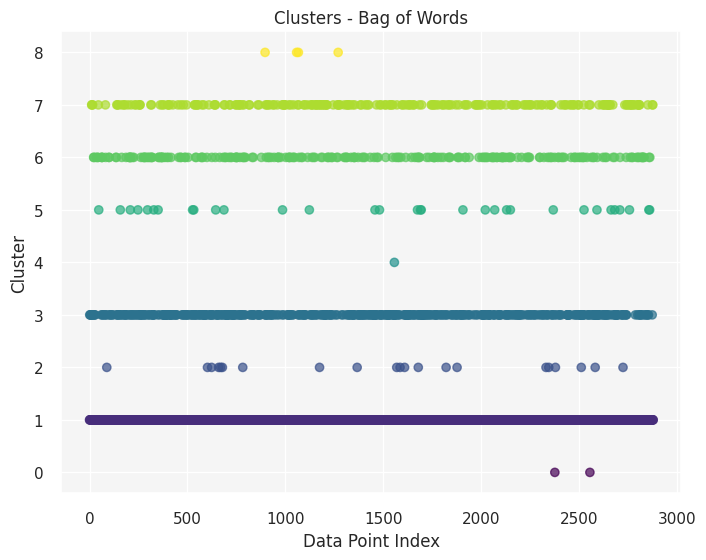

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(label_kmeans_bow)), label_kmeans_bow, c=label_kmeans_bow, cmap='viridis', alpha=0.7)
plt.xlabel('Data Point Index')
plt.ylabel('Cluster')
plt.title('Clusters - Bag of Words')
plt.show()

###Plot the clusters for TF-IDF representation with k_means

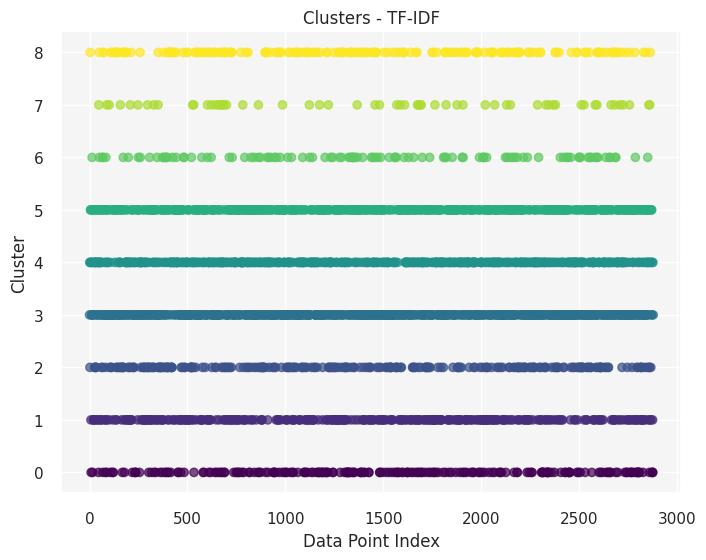

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(label_kmeans_tfidf)), label_kmeans_tfidf, c=label_kmeans_tfidf, cmap='viridis', alpha=0.7)
plt.xlabel('Data Point Index')
plt.ylabel('Cluster')
plt.title('Clusters - TF-IDF')
plt.show()

###Plot the clusters for Word2Vec representation with k_means

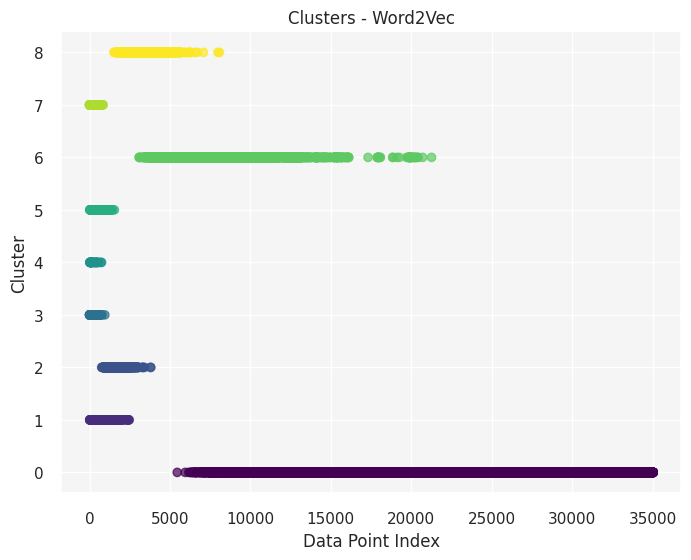

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(label_kmeans_word2vec)), label_kmeans_word2vec, c=label_kmeans_word2vec, cmap='viridis', alpha=0.7)
plt.xlabel('Data Point Index')
plt.ylabel('Cluster')
plt.title('Clusters - Word2Vec')
plt.show()

###2.1 Hierarchical clustering With BOW

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [ ]:
# method to reduce dimension of data to visualize it
tsna_bow = TSNE(n_components= 2, random_state= 42)
data_tsna_bow = tsna_bow.fit_transform(bow.toarray())

In [ ]:
agg_bow= AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
labels_HC_bow= agg_bow.fit_predict(data_tsna_bow)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


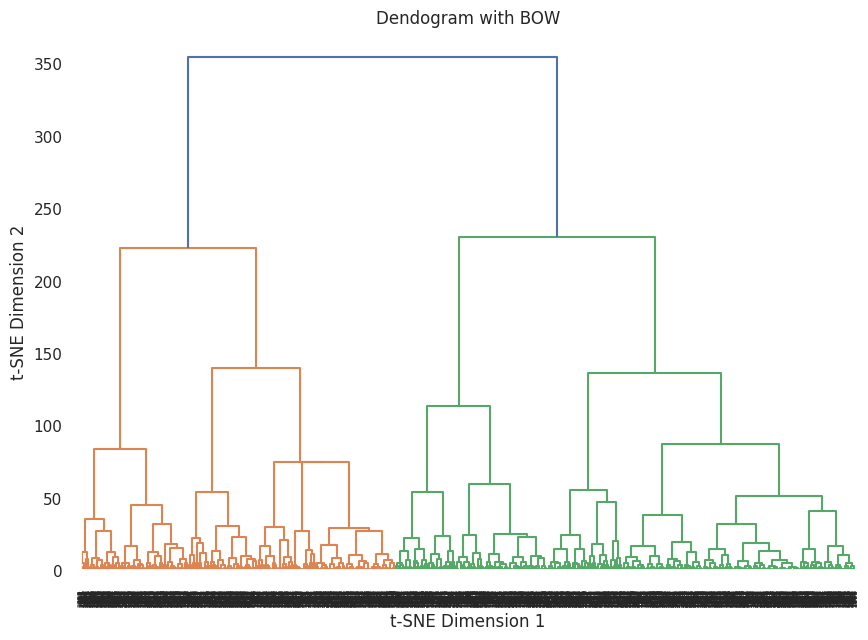

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram with BOW")
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

dend_bow= shc.dendrogram(shc.linkage(data_tsna_bow, method='ward'))

###2.2 Hierarchical clustering With tfidf

In [ ]:
# method to reduce dimension of data to visualize it
tsna_tfidf = TSNE(n_components= 2, random_state= 42)
data_tsna_tfidf = tsna_tfidf.fit_transform(tfidf.toarray())

In [ ]:
agg_tfidf= AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
labels_HC_tfidf= agg_tfidf.fit_predict(data_tsna_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


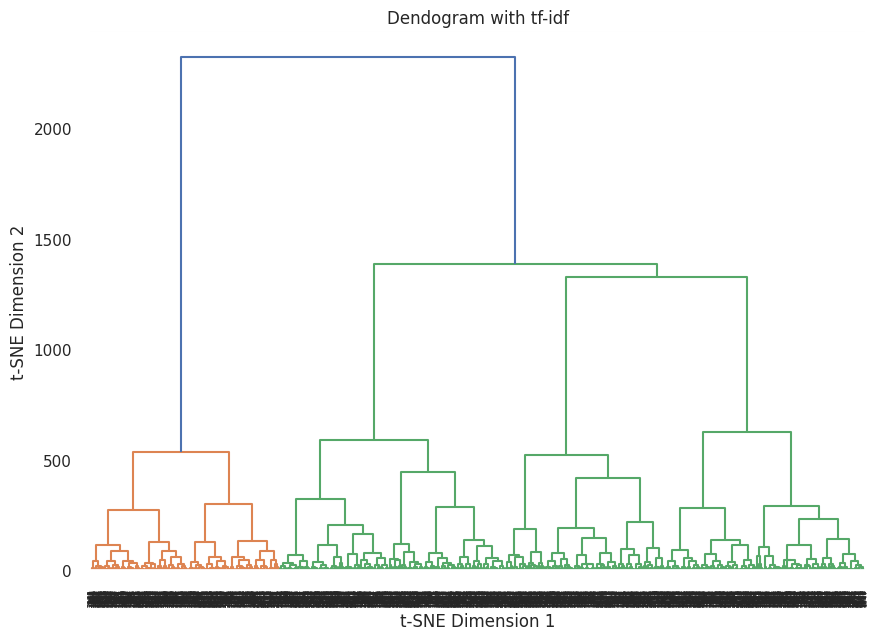

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram with tf-idf")
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

dend_tfidf= shc.dendrogram(shc.linkage(data_tsna_tfidf, method='ward'))


###2.3 Hierarchical clustering With word emdedding

In [ ]:
# method to reduce dimension of data to visualize it
tsna_word = TSNE(n_components= 2, random_state= 42)
data_tsna_WE = tsna_word.fit_transform(word2vec.wv.vectors)

In [ ]:
agg_WE= AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
labels_HC_WE= agg_WE.fit_predict(data_tsna_WE)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


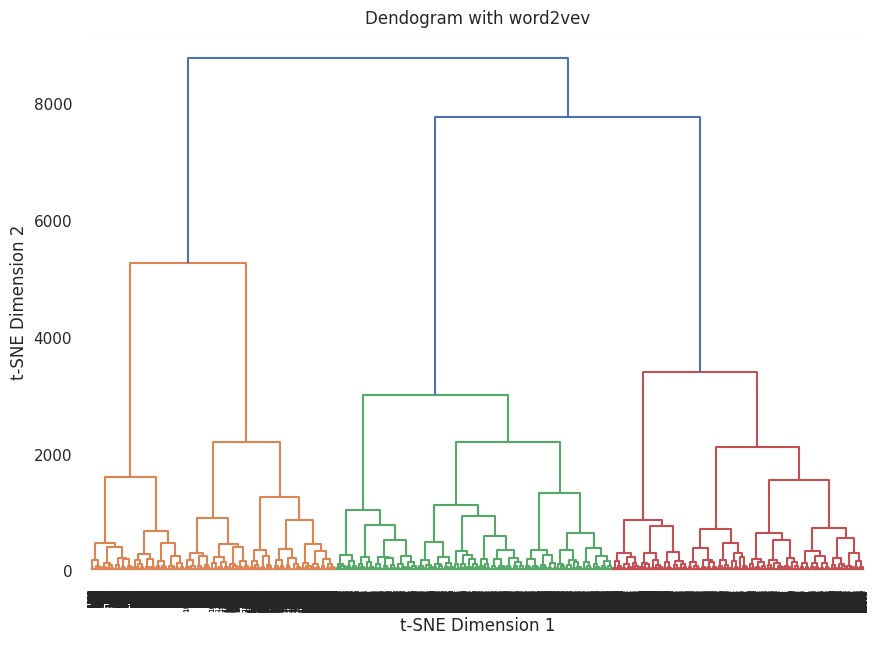

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.title("Dendogram with word2vev")
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

dend_WE= shc.dendrogram(shc.linkage(data_tsna_WE, method='ward'))


###Silhouette with Hierarchical clustering

In [ ]:
print("Silhouette Score of Hierarchical clustering With BOW      :  {:.4f}".format(silhouette_score(data_tsna_bow, labels_HC_bow)))
print("Silhouette Score of Hierarchical clustering With TFIDF    :  {:.4f}".format(silhouette_score(data_tsna_tfidf, labels_HC_tfidf)))
print("Silhouette Score of Hierarchical clustering With Word2Vec :  {:.4f}".format(silhouette_score(data_tsna_WE, labels_HC_WE)))


Silhouette Score of Hierarchical clustering With BOW      :  0.2708
Silhouette Score of Hierarchical clustering With TFIDF    :  0.2957
Silhouette Score of Hierarchical clustering With Word2Vec :  0.3149


# extractive text summarization

In [ ]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

def sentence_similarity(sent1, sent2, embed_model):
    embeddings = embed_model([sent1, sent2])
    similarity_score = 1 - np.dot(embeddings[0], embeddings[1]) / (np.linalg.norm(embeddings[0]) * np.linalg.norm(embeddings[1]))
    return similarity_score


In [ ]:
def build_similarity_matrix(data, column_name, embed_model):
    sentences = data[column_name].tolist()
    num_sentences = len(sentences)
    similarity_matrix = np.zeros((num_sentences, num_sentences))

    for idx1 in range(num_sentences):
        for idx2 in range(num_sentences):
            if idx1 != idx2:
                sent1 = sentences[idx1]
                sent2 = sentences[idx2]
                similarity_matrix[idx1][idx2] = sentence_similarity(sent1, sent2, embed_model)

    return similarity_matrix

In [ ]:
subset_data = merged_df.head(50)
similarity_matrix = build_similarity_matrix(subset_data, 'document',embed)
similarity_matrix.shape

(50, 50)

In [ ]:
output_notebook()

g = nx.Graph()

for i in range(similarity_matrix.shape[0]):
    for j in range(similarity_matrix.shape[1]):
        if similarity_matrix[i][j] >=.9:
            g.add_edge(i, j)

HOVER_TOOLTIPS = [("article_tok", "@index")]
plot = figure(tooltips = HOVER_TOOLTIPS, tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1))

network_graph = from_networkx(g, networkx.spring_layout, scale=7, center=(0, 0))
network_graph.node_renderer.glyph = Circle(size=15,fill_color='thistle')
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)
plot.renderers.append(network_graph)
show(plot)

In [ ]:
# split the the text in the articles into sentences
subset=merged_df['clean_text'].head(1)
sentences = []
for s in subset:
  sentences.append(sent_tokenize(s))

In [ ]:
# flatten the list
sentences = [y for x in sentences for y in x]

In [ ]:
sentences

In [ ]:

# remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

# make alphabets lowercase
clean_sentences = [s.lower() for s in clean_sentences]

In [ ]:
nltk.download('stopwords')# one time execution


In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [ ]:

# function to remove stopwords
def remove_stopwords(sen):
  sen_new = " ".join([i for i in sen if i not in stop_words])
  return sen_new

In [ ]:

# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [ ]:
# #download pretrained GloVe word embeddings
! wget http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
! unzip glove*.zip


In [ ]:

# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [ ]:

sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(v)

In [ ]:
len(sentence_vectors)


In [ ]:
sim_mat = np.zeros([len(sentences), len(sentences)])


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
for i in range(len(sentences)):
  for j in range(len(sentences)):
    if i != j:
      sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

In [ ]:

import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)


In [ ]:
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)


In [ ]:

# Specify number of sentences to form the summary
sn = 1
# Initialize generated_summary variable
generated_summary = ""

# Generate summary
for i in range(sn):
    generated_summary += ranked_sentences[i][1] + " "

# Print the generated summary
print(generated_summary)

In [ ]:
original_summary=df_english['summary'].iloc[0]

original_summary

In [ ]:
print(f"Senetence Similarity Score : {sentence_similarity(generated_summary, original_summary, embed)}")


#Abstractive

In [ ]:
# Load tokenizer
tokenizer = PegasusTokenizer.from_pretrained("google/pegasus-xsum")

In [ ]:
# Load Pegasus model
model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-xsum")

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#Take a sample from dataset to test Abstractive model
document=data['document'].iloc[11]
original_summary=data['summary'].iloc[11]


In [ ]:
#print document
document

'Weaknesses in the way mice swapped data with computers left them vulnerable, said security firm Bastille Networks.\nAttackers could spoof poorly protected signals letting them use PCs as if they were sitting in front of them, it said.\nInformation about the loopholes have been passed to the makers of vulnerable mice, some of who are creating updates to make the mice more secure.\nThe radio signals sent by many wireless mice to a "dongle" plugged in to a computer were often unencrypted, said Marc Newlin and Balint Seeber, from Bastille, who carried out the research.\n"That makes it possible for the attacker to send unencrypted traffic to the dongle pretending to be a keyboard and have it result as keystrokes on your computer," Mr Newlin said.\nBy contrast, they said, signals sent by wireless keyboards were scrambled to stop attackers eavesdropping on or spoofing them.\nThe pair found they could spoof signals for mice using a few lines of code and an antenna and dongle that cost $20 (Â£

In [ ]:
#print Original summary
original_summary

'Hackers could gain access to home and corporate networks via security flaws in wireless mice, suggests research.'

In [ ]:
# Create tokens - number representation of our text
tokens = tokenizer(document, truncation=True, padding="longest", return_tensors="pt")
# Summarize document
generated_summary = model.generate(**tokens)
# Convert the token IDs to text summaries
decoded_summaries = tokenizer.decode(generated_summary[0], skip_special_tokens=True)

In [ ]:
#print decoded summary generated by the model
decoded_summaries

'Many popular wireless mice are vulnerable to being hijacked by hackers, research suggests.'

In [ ]:
def remove_stopwords(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Get the list of stopwords for the English language
    stop_words = set(stopwords.words('english'))

    # Remove stopwords from the token list
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    # Reconstruct the text without stopwords
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def print_sentence_with_word_count(sentence):
    # Split the sentence into individual words
    words = sentence.split()

    # Print each word in the sentence
    for idx, word in enumerate(words):
        # Print the word followed by a comma (except for the last word)
        print(word, end=', ' if idx < len(words) - 1 else ' ', flush=True)

    # Print the total number of words in parentheses
    print(f'(n_r={len(words)})')



In [ ]:
# Remove '<pad>' and < /s > from the text
decoded_summaries = decoded_summaries.replace("<pad>", "")
decoded_summaries = decoded_summaries.replace("< /s >", "")

In [ ]:
decoded_summaries = decoded_summaries.replace(".", "")
reference_summary = original_summary.replace(".", "")

In [ ]:
decoded_summaries=remove_stopwords(decoded_summaries)
reference_summary=remove_stopwords(reference_summary)


In [ ]:
words = decoded_summaries.replace(",", "").split()

# Step 1: Remove duplicates while preserving the order of appearance
unique_words = []
for word in words:
    if word not in unique_words:
        unique_words.append(word)

# Step 2: Reconstruct the text without duplicate words
decoded_summaries = " ".join(unique_words)


In [ ]:
words = reference_summary.replace(",", "").split()

# Step 1: Remove duplicates while preserving the order of appearance
unique_words = []
for word in words:
    if word not in unique_words:
        unique_words.append(word)

# Step 2: Reconstruct the text without duplicate words
reference_summary = " ".join(unique_words)

Reference Tokens Refer to the original summay

In [ ]:
print("Reference Tokens:")
print_sentence_with_word_count(str(decoded_summaries))


Reference Tokens:
Many, popular, wireless, mice, vulnerable, hijacked, hackers, research, suggests (n_r=9)


Candidate Tokens Refer to the generated summay

In [ ]:
print("Candidate Tokens:")
print_sentence_with_word_count(str(reference_summary))

Candidate Tokens:
Hackers, could, gain, access, home, corporate, networks, via, security, flaws, wireless, mice, suggests, research (n_r=14)


combine words together to match Bi-grams

In [ ]:
# Split the reference and candidate text into tokens based on spaces
reference_tokens = reference_summary.split()
candidate_tokens = decoded_summaries.split()

# Combine tokens into n-grams for reference tokens
n_r = 2  # Set the desired 'n' for n-grams in reference tokens
reference_tokens_ngrams = [' '.join(reference_tokens[i:i + n_r]) for i in range(len(reference_tokens) - n_r + 1)]
candidate_tokens_ngrams = [' '.join(candidate_tokens[i:i + n_r]) for i in range(len(candidate_tokens) - n_r + 1)]


In [ ]:
print("Reference Tokens:")
print(reference_tokens_ngrams, f"(n_r={len(reference_tokens_ngrams)})")


Reference Tokens:
['Hackers could', 'could gain', 'gain access', 'access home', 'home corporate', 'corporate networks', 'networks via', 'via security', 'security flaws', 'flaws wireless', 'wireless mice', 'mice suggests', 'suggests research'] (n_r=13)


In [ ]:
print("Candidate Tokens:")
print(candidate_tokens_ngrams, f"(n_can={len(candidate_tokens_ngrams)})")

Candidate Tokens:
['Many popular', 'popular wireless', 'wireless mice', 'mice vulnerable', 'vulnerable hijacked', 'hijacked hackers', 'hackers research', 'research suggests'] (n_can=8)


Use Rouge Score to calculate the accuracy of the model

In [ ]:
# Initialize the ROUGE scorer
rouge = Rouge()
# Calculate ROUGE scores
scores = rouge.get_scores(reference_summary,decoded_summaries,  avg=True)

# Iterate over each ROUGE metric
for metric, scores in scores.items():
    # Get the values for recall, precision, and F1-score
    recall = scores['r']
    precision = scores['p']
    f1_score = scores['f']

    # Print the ROUGE metric and values in new lines with details as comments
    print(f"ROUGE-{metric}:")
    print(f"Recall (r): {recall:.2f}  # {recall * 100:.2f}%")
    print(f"Precision (p): {precision:.2f}  # {precision * 100:.2f}%")
    print(f"F1-score (f): {f1_score:.2f}  # {f1_score * 100:.2f}%")
    print()

ROUGE-rouge-1:
Recall (r): 0.44  # 44.44%
Precision (p): 0.29  # 28.57%
F1-score (f): 0.35  # 34.78%

ROUGE-rouge-2:
Recall (r): 0.12  # 12.50%
Precision (p): 0.08  # 7.69%
F1-score (f): 0.10  # 9.52%

ROUGE-rouge-l:
Recall (r): 0.33  # 33.33%
Precision (p): 0.21  # 21.43%
F1-score (f): 0.26  # 26.09%

